# ***Sprint - 1***

# Image preprocessing

Importing data set

In [ ]:
!unzip '/content/conversation engine for deaf and dumb.zip'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import ImageDataGenerator Library And Configure It

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1./255)

Applying ImageDataGenerator Functionality To Train And Test Set

In [ ]:
# Training Dataset
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/training_set',target_size=(64,64),class_mode='categorical',batch_size=1000)

Found 15760 images belonging to 9 classes.


In [ ]:
# Testing Dataset
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test_set',target_size=(64,64),class_mode='categorical',batch_size=900)

Found 2250 images belonging to 9 classes.


# ***Sprint - 2***

# Model Building

In [ ]:
# Import The Required Model Building Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
# Initialize The Model
model=Sequential()

In [ ]:
# Add The Convolution Layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [ ]:
# Add The Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Add The Flatten Layer
model.add(Flatten())

In [ ]:
# Adding The Dense Layers
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [ ]:
# Compile The Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Fit the Model
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
16/16 [==============================] - 2604s 164s/step - loss: 1.9601 - accuracy: 0.4551 - val_loss: 0.6767 - val_accuracy: 0.7827
Epoch 2/10
16/16 [==============================] - 102s 6s/step - loss: 0.4726 - accuracy: 0.8687 - val_loss: 0.3202 - val_accuracy: 0.9147
Epoch 3/10
16/16 [==============================] - 107s 7s/step - loss: 0.1949 - accuracy: 0.9468 - val_loss: 0.2206 - val_accuracy: 0.9347
Epoch 4/10
16/16 [==============================] - 101s 6s/step - loss: 0.1017 - accuracy: 0.9725 - val_loss: 0.1718 - val_accuracy: 0.9591
Epoch 5/10
16/16 [==============================] - 102s 6s/step - loss: 0.0567 - accuracy: 0.9857 - val_loss: 0.1817 - val_accuracy: 0.9698
Epoch 6/10
16/16 [==============================] - 104s 6s/step - loss: 0.0396 - accuracy: 0.9900 - val_loss: 0.1623 - val_accuracy: 0.9729
Epoch 7/10
16/16 [==============================] - 100s 6s/step - loss: 0.0275 - accuracy: 0.9942 - val_loss: 0.1730 - val_accuracy: 0.9756
Epoch 8/10

In [ ]:
# Save The Model
model.save('aslpng1.h5')

# Test the model

Import The Packages And Load The Saved Model

In [64]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [65]:
model=load_model('/content/drive/MyDrive/Model building/aslpng1.h5')

Load The Test Image, Pre-Process It And Predict

**Test_1**

(64, 64, 3)


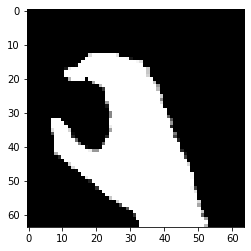

In [66]:
x = cv2.imread('/content/drive/MyDrive/Dataset/test_set/C/15.png',1)
img = cv2.resize(x,(64,64))
plt.imshow(img)
print(img.shape)

In [70]:
img = image.load_img('/content/drive/MyDrive/Dataset/test_set/C/184.png',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['A','B','C','D','E','F','G','H','I']
print("THE PREDICTED LETTER IS",op[pred])

1/1 [==============================] - 0s 31ms/step
THE PREDICTED LETTER IS C


**Test_2**

(64, 64, 3)


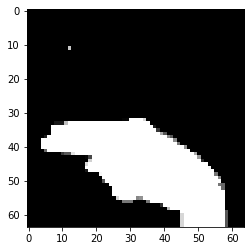

In [68]:
x = cv2.imread('/content/drive/MyDrive/Dataset/test_set/H/65.png',1)
img = cv2.resize(x,(64,64))
plt.imshow(img)
print(img.shape)

In [71]:
img = image.load_img('/content/drive/MyDrive/Dataset/test_set/H/50.png',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['A','B','C','D','E','F','G','H','I']
print("THE PREDICTED LETTER IS",op[pred])

1/1 [==============================] - 0s 29ms/step
THE PREDICTED LETTER IS H
